In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from knn_weights import *
from matplotlib.colors import ListedColormap

from space_metric import *
from knn_plot import *
from knn_tests import *
from knn_weights import *

import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from pandas.plotting import scatter_matrix
import seaborn as sns
from knn_classifier_class import *

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
def createPointsInCircle(center, radius, number = 500):
    x = np.random.normal(center[0], radius * 0.4, number)
    y = np.random.normal(center[1], radius * 0.4, number)
    #x = np.random.uniform(center[0] - radius, center[0] + radius, number)
    #y = np.random.uniform(center[1] - radius, center[1] + radius, number)

    points = np.dstack([x, y]).reshape(-1, 2)

    points = points[np.linalg.norm(points[:,:2] - center, axis=1) < radius]

    return points

In [29]:
def createPointsInEllipse(center, w, h, angle, number):
    max_dim = max(w, h)
    x = np.random.uniform(center[0] - max_dim, center[0] + max_dim, number)
    y = np.random.uniform(center[1] - max_dim, center[1] + max_dim, number)
    
    cos_angle = np.cos(np.radians(180. - angle))
    sin_angle = np.sin(np.radians(180. - angle))

    xc = x - center[0]
    yc = y - center[1]

    xct = xc * cos_angle - yc * sin_angle
    yct = xc * sin_angle + yc * cos_angle 

    rad_cc = (xct**2/(w/2.)**2) + (yct**2/(h/2.)**2)
    
    idx = np.where(rad_cc <= 1.)[0]
    x = x[idx]
    y = y[idx]

    points = np.dstack([x, y]).reshape(-1, 2)
    return points

In [56]:
ellipse1 = createPointsInEllipse((0.8, 0.8), 0.3, 0.1, 45, 5000)
ellipse2 = createPointsInEllipse((0.9, 0.7), 0.3, 0.1, 45, 5000)

X = np.concatenate([ellipse1, ellipse2])
y = np.concatenate([np.zeros(ellipse1.shape[0]), np.ones(ellipse2.shape[0])])

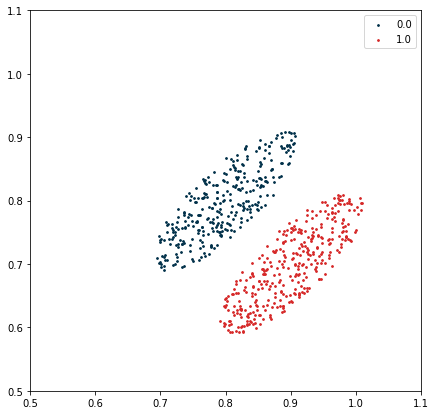

In [63]:
plt.rcParams['figure.figsize'] = [7, 7]

#print(points)

fig, ax = plt.subplots()

scatter_markers(ax, X[:, 0], X[:, 1], y, 3, 'o')

ax.set_xlim([0.5, 1.1])
ax.set_ylim([0.5, 1.1])

ax.legend()
plt.show()


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [65]:
knn_classifier = KnnPowerClassifier(get_dst_metric(2), triangular_window, 100, 30)
knn_classifier.fit(X_train, y_train)

In [67]:
knn_classifier.reduce()

In [68]:
prediction = knn_classifier.predict(X_test)
accuracy = compute_accuracy(prediction, np.int0(y_test))
print(accuracy)


1.0


(0.5, 1.1)

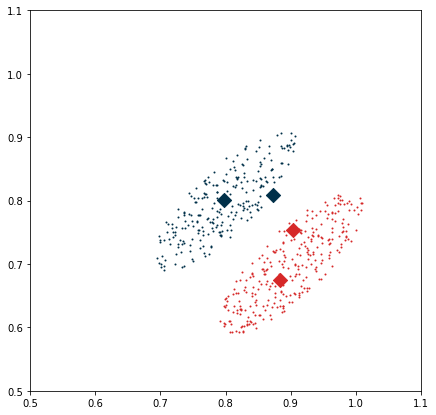

In [70]:
plt.rcParams['figure.figsize'] = [7, 7]

fig, ax = plt.subplots()

scatter_markers(ax, X_train[:, 0], X_train[:, 1], y_train, 1, 'o')
scatter_markers(ax, knn_classifier.reduced_x[:, 0], knn_classifier.reduced_x[:, 1], knn_classifier.reduced_y, 100, 'D')

ax.set_xlim([0.5, 1.1])
ax.set_ylim([0.5, 1.1])
